# <center>An Analysis of Transformative Works Created by Fans of the Harry Potter Series in Reaction to the Author's Public Political Comments</center>

## <center>Project completed by Kymberlee McMaster on May 16th, 2022</center>

### <center>Introduction</center>

Fans are often known for using their talents and dedication to create new media based on the things they enjoy. One of the best examples of this is the writing and reading of fanfiction, the practice in which amateur authors may take aspects from the original content that they enjoyed and transforming them into original works of their own creation. There are various methods that these authors use to share their works with other individuals who also enjoyed the original piece of media but one of the most common is to post the work to a dedicated site for the posting and reading of fanfiction. While there are quite a few options available, we'll be focusing on Archive of Our Own, known colloquially as AO3, for our purposes as AO3's built in tagging and data storage system will allow us to search through the works of fiction using the author's own tags for their work rather than attempting to create tags ourself. 

However, since AO3 currently has over nine million works, in order to better analyze the data associated with the site and trends of fanfiction authors, we'll be focusing on writings by fans of a specific piece of media: the Harry Potter series written by J.K. Rowling.[[1]](https://archiveofourown.org/works/search?work_search%5Bquery%5D=) Additionally, we'll be specifically be focusing on the fanfiction written around a specific date in time as there are over 300,000 works for that series alone. 

On June 6th of 2020, author J.K. Rowling took to Twitter to express her displeasure over the use of the phrase "people who menstruate" rather than the word women.[[2]](https://www.glamour.com/story/a-complete-breakdown-of-the-jk-rowling-transgender-comments-controversy) This tweet and the subsequent tweets that followed it came under a lot of backlash with trans activists and fans of the Harry Potter series. This was not the first time that author J.K. Rowling had expressed such views and received backlash, but it is one of the most notable, so we will be analyzing works of fanfiction posted onto AO3 for the month before the tweet was made and the month following the tweet to view the potential impact that Rowling's postings may have had on the writings of the LGBTQIA+ community members and their allies. 

<b>An Important Note:</b> Content posted on AO3, while subject to AO3's terms of service, is not policed for the actual content itself. AO3's dedication to protect the authors who post on their site means that content posted to the site can contain a wide array of mature content, as most of their focus on author protection are centered around protecting the author from backlash by the original owners of the potentially trademarked intellectual property. Per their own site: "The Archive does not prescreen for content. Complaints are investigated only when they are submitted through the appropriate channels and with the appropriate information."[[3]](https://archiveofourown.org/tos#content) Users are expected to police their own media consumption through the use of the built-in tagging system. This means that some of the information we collect about fics for this project may mention or allude to mature themes. 

### <center>Data Collection</center>

As AO3 does not have a built in API, we will need to build our own method of scraping the data found on the site. In order to collect the data and avoid unneccesary scraping we'll be using AO3's built in search function to pre-search for works that were created between our dates of interest: May 23rd,2020 and June 19th, 2020. We do this by accessing the Works Search page located [here](https://archiveofourown.org/works/search), and entering our parameters into the Any Search field: created_at:["2020-05-06" TO "2020-06-05"] and created_at:["2020-06-06" TO "2020-07-05"]. As well as selecting the English language option for both. This will generate the links that we can use in the data scraper that will gather the information about the works for us, located [here for pre-tweet data](https://archiveofourown.org/works/search?commit=Search&page=1&work_search[bookmarks_count]=&work_search[character_names]=&work_search[comments_count]=&work_search[complete]=&work_search[creators]=&work_search[crossover]=&work_search[fandom_names]=Harry+Potter+-+J.+K.+Rowling&work_search[freeform_names]=&work_search[hits]=&work_search[kudos_count]=&work_search[language_id]=en&work_search[query]=created_at%3A[%222020-05-06%22+TO+%222020-06-05%22]&work_search[rating_ids]=&work_search[relationship_names]=&work_search[revised_at]=&work_search[single_chapter]=0&work_search[sort_column]=created_at&work_search[sort_direction]=asc&work_search[title]=&work_search[word_count]=) and [here for post-tweet data](https://archiveofourown.org/works/search?commit=Search&page=1&work_search[bookmarks_count]=&work_search[character_names]=&work_search[comments_count]=&work_search[complete]=&work_search[creators]=&work_search[crossover]=&work_search[fandom_names]=Harry+Potter+-+J.+K.+Rowling&work_search[freeform_names]=&work_search[hits]=&work_search[kudos_count]=&work_search[language_id]=en&work_search[query]=created_at%3A[%222020-06-06%22+TO+%222020-07-05%22]&work_search[rating_ids]=&work_search[relationship_names]=&work_search[revised_at]=&work_search[single_chapter]=0&work_search[sort_column]=created_at&work_search[sort_direction]=asc&work_search[title]=&work_search[word_count]=). 

By looking at our search results, we will see that we will be scraping the information about 3,919 works that were created and area available publicly without an account in the first month time period we've identified and 3,637 for the second month. Below, we will first import the libararies necessary for this project. 

In [25]:
# Import the libraries necessary to complete this project 
import requests
import math
from bs4 import BeautifulSoup 
import csv
import regex as re 
import random
import time
import pandas as pd 
import numpy as np 
from datetime import datetime 
import matplotlib.pyplot as plt 

With our libaries imported, we can start off by initializing some of the necessary variables and setting up the CSV files we will be using to temporarily store all of this data. We know that there are 3,919 works to be consumed for the first month, and there are 20 works displayed on each search page so we'll need to request the informtion from 196 pages. Doing the same calculations on the second month's 3,637 works, we will also need to request the data from their 182 pages. 

We split both URLs into parts before and after the page number is stored to that we can complete our requests through an iterative process which automatically updates the page number used to request data. Then we initialize a new files to store the content from the scraping as we'll be completing it in page portions and that would make it difficult to store as a pandas dataframe right off the bat. 

In [2]:
#Split the URLs into parts and store the current page number with those parts 
url1pt1 = "https://archiveofourown.org/works/search?commit=Search&page="
currpagenum1 = 1
url1pt2 = "&work_search[bookmarks_count]=&work_search[character_names]=&work_search[comments_count]=&work_search[complete]=&work_search[creators]=&work_search[crossover]=&work_search[fandom_names]=Harry+Potter+-+J.+K.+Rowling&work_search[freeform_names]=&work_search[hits]=&work_search[kudos_count]=&work_search[language_id]=en&work_search[query]=created_at%3A[%222020-05-06%22+TO+%222020-06-05%22]&work_search[rating_ids]=&work_search[relationship_names]=&work_search[revised_at]=&work_search[single_chapter]=0&work_search[sort_column]=created_at&work_search[sort_direction]=asc&work_search[title]=&work_search[word_count]="

#Split the URLs into parts and store the current page number with those parts 
url2pt1 = "https://archiveofourown.org/works/search?commit=Search&page="
currpagenum2 = 1
url2pt2 = "&work_search[bookmarks_count]=&work_search[character_names]=&work_search[comments_count]=&work_search[complete]=&work_search[creators]=&work_search[crossover]=&work_search[fandom_names]=Harry+Potter+-+J.+K.+Rowling&work_search[freeform_names]=&work_search[hits]=&work_search[kudos_count]=&work_search[language_id]=en&work_search[query]=created_at%3A[%222020-06-06%22+TO+%222020-07-05%22]&work_search[rating_ids]=&work_search[relationship_names]=&work_search[revised_at]=&work_search[single_chapter]=0&work_search[sort_column]=created_at&work_search[sort_direction]=asc&work_search[title]=&work_search[word_count]="


#Identified the number of works and pages that the scraper will need to iterate through
works1 = 3919
pages1 = math.ceil(works1/20)

works2 = 3637
pages2 = math.ceil(works2/20)

#Iniate a new file to store the basic content from the scraping 
header = ['Title', 'Author', 'ID', 'Date_updated', 'Rating', 'Pairing', 'Warning', 'Complete', 'Language', 'Word_count', 'Num_chapters', 'Num_comments', 'Num_kudos', 'Num_bookmarks', 'Num_hits', 'Tags', 'Summary']
with open('storedbasic1.csv','w', encoding='utf8') as storedbasic1:
    writer = csv.writer(storedbasic1)
    writer.writerow(header)
    
    
#Iniate a new file to store the basic content from the scraping 
header = ['Title', 'Author', 'ID', 'Date_updated', 'Rating', 'Pairing', 'Warning', 'Complete', 'Language', 'Word_count', 'Num_chapters', 'Num_comments', 'Num_kudos', 'Num_bookmarks', 'Num_hits', 'Tags', 'Summary']
with open('storedbasic2.csv','w', encoding='utf8') as storedbasic2:
    writer = csv.writer(storedbasic2)
    writer.writerow(header)

Now that we've completed some of our basic work, we can begin to design some of the functions we'll need to call to scrape the data out of the page. First, we have inspect the page to see how the data on each page is stored. By using the developers tools, we can see that the results of the search are displayed in a class identified as a “works index group" and each work is a list item below that with the role "article". 

<center><b>Page Inspection Using Web Developer Tools</b></center>
<center><img src="PageInspect.png"></center>


We'll use that information to define our helper function that will take the BeautifulSoup from a page, add the relevant information about the work to various lists and then store those lists into the CSV file that we previously initialized. 

There are a couple interesting things to note here about the information we are choosing to gather. AO3 has built in site protections that displays a simple Retry Later if too many requests are being made to the site by one person at a time. As such, we are only scraping the information that is available from the works search page since that means we only search the number of pages in the search results rather than gathering the content that is available on the works' pages themselves. One such example of information that could have been gathered from the works' pages is the comments associated with the work. AO3 allows for author-specific comments sections in which the author of the work can choose whether or not to allow comments and if they are allowing comments, whether those comments need to come from someone who holds an account with the site itself. While these comments could have had some interested information for us to take a look at, we area already dealing with an extremely large amount of data and the scraping of the comments section would have required that we scrape each individual webpage for the 3,523 different works that we have gathered data on. 

In [3]:

#Function to gather all data 
def basicdata(mysoup, csv): 
    #Initialize a set of variables to store all titles and info for page to add to the CSV all at once 
    titles = []
    authors = []
    ids = []
    date_updated = []
    ratings = []
    pairings = []
    warnings = []
    complete = []
    languages = []
    word_count = []
    chapters = []
    comments = []
    kudos = []
    bookmarks = []
    hits = []
    tags = []
    summary = []
    
    for article in mysoup.find_all('li', {'role':'article'}):
        titles.append(article.find('h4', {'class':'heading'}).find('a').text)
        try:
            authors.append(article.find('a', {'rel':'author'}).text)
        except:
            authors.append('Anonymous')
        ids.append(article.find('h4', {'class':'heading'}).find('a').get('href')[7:])
        date_updated.append(article.find('p', {'class':'datetime'}).text)
        ratings.append(article.find('span', {'class':re.compile(r'rating\-.*rating')}).text)
        pairings.append(article.find('span', {'class':re.compile(r'category\-.*category')}).text)
        warnings.append(article.find('span', {'class':re.compile(r'warning\-.*warnings')}).text)
        complete.append(article.find('span', {'class':re.compile(r'complete\-.*iswip')}).text)
        languages.append(article.find('dd', {'class':'language'}).text)
        tags.append(article.find('ul', {'class':'tags commas'}).text)
        count = article.find('dd', {'class':'words'}).text
        if len(count) > 0:
            word_count.append(count)
        else:
            word_count.append('0')
        chapters.append(article.find('dd', {'class':'chapters'}).text.split('/')[0])
        try:
            comments.append(article.find('dd', {'class':'comments'}).text)
        except:
            comments.append('0')
        try:
            kudos.append(article.find('dd', {'class':'kudos'}).text)
        except:
            kudos.append('0')
        try:
            bookmarks.append(article.find('dd', {'class':'bookmarks'}).text)
        except:
            bookmarks.append('0')
        try:
            hits.append(article.find('dd', {'class':'hits'}).text)
        except:
            hits.append('0')
        #try: 
            #tags.append(article.find('span', {'class':re.compile(r'freeforms\-.*freeforms')}).text)
        #except: 
            #tags.append(' ')
        try:
            summary.append(article.find('blockquote', {'class':'userstuff summary'}).text)
        except: 
            summary.append(' ')
            
            
    df = pd.DataFrame(list(zip(titles, authors, ids, date_updated, ratings, pairings,\
                              warnings, complete, languages, word_count, chapters,\
                               comments, kudos, bookmarks, hits, tags, summary)))
    
    with open(csv,'a', encoding='utf8') as storedbasic:
        df.to_csv(storedbasic, header=False, index=False)
    

With our helper function for our basic data, we can now  iterate through the pages of the searched works and gather the basic data into the CSV files previously created. As previously stated, due to AO3's built in site protections, we will scrape by increments of pages and pause between each set of pages in order to ensure that we can gather all of the data we are trying to request from the site. For our purposes, we will be using an increment of 100 pages as it was a nice round number that was regularly accepted by the site and then a pause time of 10 minutes so that enough time had elapsed after our previous round that it would accept the next round of 100 pages being requested. We will first complete the requests for the first month's data and then follow up with the second month's. 

In [4]:
#Reset page number in case anything has gotten messed up with the block
currpagenum1 = 1

#This for loop will iterate through the pages for the first month and add the basic data to the basic data table 
for i in range(1, pages1 + 1): 
    
    url1 = url1pt1 + str(currpagenum1) + url1pt2 
    page1 = requests.get(url1)
    soup1 = BeautifulSoup(page1.content, "html.parser")
    
    csv1 = 'storedbasic1.csv'
    
    basicdata(soup1, csv1) 
    
    currpagenum1 += 1
    
    if (i % 100) == 0 : 
        print("Taking a break from parsing. Current page count is: " + str(currpagenum1 - 1) )
        print("Will resume in 10 min")
        time.sleep(600)
        print("Wait time is over, will resume parsing now.")
    
print("First Month parsing has finished, the remainder of that month's data has been consumed")


print("Taking a break from parsing. Will resume in 10 min" )
time.sleep(600)

#Reset page number in case anything has gotten messed up with the block
currpagenum2 = 1


#This for loop will iterate through the pages for the first month and add the basic data to the basic data table 
for j in range(1, pages2 + 1): 
    
    url2 = url2pt1 + str(currpagenum2) + url2pt2 
    page2 = requests.get(url2)
    soup2 = BeautifulSoup(page2.content, "html.parser")
    
    csv2 = 'storedbasic2.csv'
    
    basicdata(soup2, csv2) 
    
    currpagenum2 += 1
    
    if (j % 100) == 0 : 
        print("Taking a break from parsing. Current page count is: " + str(currpagenum2 - 1) )
        print("Will resume in 10 min")
        time.sleep(600)
        print("Wait time is over, will resume parsing now.")
    
print("Second Month parsing has finished, the remainder of that month's data has been consumed")

Taking a break from parsing. Current page count is: 100
Will resume in 10 min
Wait time is over, will resume parsing now.
First Month parsing has finished, the remainder of that month's data has been consumed
Taking a break from parsing. Will resume in 10 min
Taking a break from parsing. Current page count is: 100
Will resume in 10 min
Wait time is over, will resume parsing now.
Second Month parsing has finished, the remainder of that month's data has been consumed


The output of the page parsing into the CSV files is several print statements that just allow us to view where our current parsing status is, as we have a 10 minute break included in our parsing so we want to be able to know that everything is continuing to process and move along smoothly. 

With all of the data parsed into CSV files, we can now use the built in pandas functionality to create a pandas dataframe that we can use to manipulate our data. 

In [7]:
#Use read_csv to read the data stored in the CSV files into pandas dataframes
AO3May = pd.read_csv("storedbasic1.csv")
AO3June = pd.read_csv("storedbasic2.csv")

#Append the two dataframes 
AO3 = pd.concat([AO3May, AO3June], axis = 0)

#Display the combined dataframe
display(AO3)

,Title,Author,ID,Date_updated,Rating,Pairing,Warning,Complete,Language,Word_count,Num_chapters,Num_comments,Num_kudos,Num_bookmarks,Num_hits,Tags,Summary
0,Seven,AmeliaDarkholme,24030196,06 May 2020,Teen And Up Audiences,"F/M, M/M",No Archive Warnings Apply,Complete Work,English,"11,217",2,3,83,8,1043,\nNo Archive Warnings ApplyAlbus Dumbledore/Ge...,"\n""It's just a dream, Albus. It's all just a d..."
1,Lullaby of Woe,EmiliaVBlake,24030472,06 Jun 2020,Mature,"F/F, F/M, M/M",Graphic Depictions Of Violence,Work in Progress,English,"60,121",12,30,58,7,2079,\nGraphic Depictions Of ViolenceHermione Grang...,"\nIt's ""eighth"" year, can Hermione put aside h..."
2,Ron's family,Lilys_Dreamland,24030550,06 May 2020,General Audiences,No category,Choose Not To Use Archive Warnings,Work in Progress,English,591,1,3,54,3,511,\nCreator Chose Not To Use Archive WarningsRon...,\nJust a bunch of fluffy One-shorts about Ron ...
3,Falling In Love (Is So Alone),hannahsoapy,24030559,05 May 2020,General Audiences,Gen,No Archive Warnings Apply,Complete Work,English,"1,091",1,0,12,2,190,\nNo Archive Warnings ApplyHermione Granger & ...,\nShe wasn't even sure when she had started to...
4,The Bloody Secret,psc07,24030709,06 May 2020,Teen And Up Audiences,F/M,Choose Not To Use Archive Warnings,Complete Work,English,"11,635",1,3,92,13,1101,\nCreator Chose Not To Use Archive WarningsJam...,\nBecause as much as she had told her parents ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,Dumbling Around in the Lake,Twisted_Magic,25098028,05 Jul 2020,General Audiences,Gen,No Archive Warnings Apply,Complete Work,English,704,1,0,6,0,122,\nNo Archive Warnings ApplyAlbus Dumbledore & ...,\nMinerva needs to relax after wrangling stude...
3633,Into the Forest (Novelized and Modified),Green274,25098052,05 Jul 2020,General Audiences,M/M,Major Character Death,Complete Work,English,"5,972",1,0,9,0,191,\nMajor Character DeathRowan Khanna & Player C...,"\nDouglas Green (MC), Merula Snyde and Ben Cop..."
3634,Live a Little,NeonDomino,25098073,05 Jul 2020,Mature,M/M,No Archive Warnings Apply,Complete Work,English,754,1,4,59,1,702,\nNo Archive Warnings ApplySirius Black/Remus ...,\nWritten in 2013. The Marauders know Remus' s...
3635,One More Question,NeonDomino,25098526,05 Jul 2020,Explicit,M/M,No Archive Warnings Apply,Complete Work,English,"2,735",1,1,125,4,2227,\nNo Archive Warnings ApplySirius Black/Remus ...,\nWritten in 2013. Remus is avoiding Sirius be...


### <center>Data Processing</center>

We now have a singular data frame, that contains all relevant information about fanfiction works that were created between May 23rd, 2020, and June 19th, 2020. However, this is the raw data so we want to first check that our dataframe is storing the data as the correct types. 

In [8]:
#Display the data frame columns with their associated types
AO3.dtypes

Title            object
Author           object
ID                int64
Date_updated     object
Rating           object
Pairing          object
Warning          object
Complete         object
Language         object
Word_count       object
Num_chapters      int64
Num_comments      int64
Num_kudos         int64
Num_bookmarks     int64
Num_hits          int64
Tags             object
Summary          object
dtype: object

As we see above, while most of the data is properly stored: integers are all stored as int64 types and strings stored are objects, one column is not with Date_Updated being stored as a string object rather than a date type. Below we update the dataframe so that Date_Updated is stored correctly and we will be able to properly use it for our data analysis. 

In [9]:
#Update the dataframe so that Date_Updated is properly stored as a datetime object 
AO3May['Date_updated']= pd.to_datetime(AO3May['Date_updated'])
AO3June['Date_updated']= pd.to_datetime(AO3June['Date_updated'])
AO3['Date_updated']= pd.to_datetime(AO3['Date_updated'])

#Display the updated types of the dataframe
AO3.dtypes

Title                    object
Author                   object
ID                        int64
Date_updated     datetime64[ns]
Rating                   object
Pairing                  object
Warning                  object
Complete                 object
Language                 object
Word_count               object
Num_chapters              int64
Num_comments              int64
Num_kudos                 int64
Num_bookmarks             int64
Num_hits                  int64
Tags                     object
Summary                  object
dtype: object

In [10]:
#Drop any data where the Date Updated was too early for range
AO3.drop(AO3[AO3['Date_updated'] < pd.Timestamp(2020,5,6)].index, inplace = True)

Returning to our original purpose, we want to see how Rowling's tweets may have impacted the posting of fans of her works who belong to the LGBTQIA+ community. As AO3 contains transformative works, and the original source material does not contain any LGBTQIA+ representation, the best way to view any potential impact is by identifying if a change occurred in the number of fanfiction works posted with LGBTQIA+ content. Especially since authors may have posted retaliatory works in which they transformed one or more of the canon characters within the work to be queer. Below shows one such example in which AO3 author, ughdotcom, posted a work and specified in their notes that the work was posted as a response to something JK Rowling had previously expressed. [[4]](https://archiveofourown.org/works/22817488)

<center><b>ughdotcom's Response Posting</b></center>
<center><img src="ughdotcom.png"></center>


Therefore, in order to best analyze potential responses by fanfiction authors, we will search for the occurrence of various queer identities and flag their presence within the tags so that we can use those flags to identify rates of posting. As seen above, the tags may contain markers before canon character names that indicate an update to something about this character, in this particular work, the character Hermione Granger is trans and Luna Lovegood is genderqueer. 

As gender and sexual identity expression is constantly changing and evolving, we will attempt to flag for most major sexual and gender identities, but there is the possibility that we may miss some. Our flags will center around the following groups who are members of the LGBTQIA+ community: lesbian, gay, bisexual, trans, nonbinary, queer, intersex, asexual, agender, and aromantic. 

We will also create aggregate flags that will be used to idenitfy if a work was referrring to gender or sexuality or either. However, since the identity queer can be used as an umbrella for both gender and sexual expression that differs from the norm, we will double count its use in both the gender and the sexualities flags.

In [11]:
#Flag for presence of Lesbian
AO3["flag_lesbian"] = np.where( (AO3["Tags"].str.contains("lesbian", case=False)) | (AO3["Pairing"].str.contains('F\\\F', regex=True)), True, False )

#Flag for presence of Gay 
AO3["flag_gay"] = np.where( (AO3["Tags"].str.contains("gay", case=False)) | (AO3["Pairing"].str.contains('M\\\M', regex=True)), True, False )

#Flag for presence of Bisexual 
AO3["flag_bisexual"] = AO3["Tags"].str.contains("bisexual", case=False)

#Flag for presence of Trans 
AO3["flag_trans"] = AO3["Tags"].str.contains("trans", case=False)

#Flag for presence of Nonbinary
AO3["flag_nb"] = AO3["Tags"].str.contains("nonbinary", case=False)

#Flag for presence of Queer 
AO3["flag_queer"] = AO3["Tags"].str.contains("queer", case=False)

#Flag for presence of Intersex 
AO3["flag_intersex"] = AO3["Tags"].str.contains("intersex", case=False)

#Flag for presence of Asexual 
AO3["flag_ace"] = AO3["Tags"].str.contains("asexual", case=False)

#Flag for presence of Agender 
AO3["flag_agender"] = AO3["Tags"].str.contains("agender", case=False)

#Flag for presence of Aromantic 
AO3["flag_aro"] = AO3["Tags"].str.contains("aromantic", case=False)

#Flag all dealing with gender 
AO3["gender_flag"] = np.where( (AO3["flag_trans"] | AO3["flag_nb"] | AO3["flag_queer"] | AO3["flag_intersex"] | AO3["flag_agender"]), True, False)

#Flag all dealing with sexuality 
AO3["sexuality_flag"] = np.where( (AO3["flag_lesbian"] | AO3["flag_gay"] | AO3["flag_bisexual"] | AO3["flag_queer"] | AO3["flag_ace"] | AO3["flag_aro"]), True, False)

#Flag all LGBT 
AO3["all_flags"] = np.where( (AO3["gender_flag"] | AO3["sexuality_flag"]), True, False)

#Display the final dataframe
AO3.head(10)

,Title,Author,ID,Date_updated,Rating,Pairing,Warning,Complete,Language,Word_count,...,flag_trans,flag_nb,flag_queer,flag_intersex,flag_ace,flag_agender,flag_aro,gender_flag,sexuality_flag,all_flags
0,Seven,AmeliaDarkholme,24030196,2020-05-06,Teen And Up Audiences,"F/M, M/M",No Archive Warnings Apply,Complete Work,English,"11,217",...,False,False,False,False,False,False,False,False,False,False
1,Lullaby of Woe,EmiliaVBlake,24030472,2020-06-06,Mature,"F/F, F/M, M/M",Graphic Depictions Of Violence,Work in Progress,English,"60,121",...,False,False,False,False,False,False,False,False,False,False
2,Ron's family,Lilys_Dreamland,24030550,2020-05-06,General Audiences,No category,Choose Not To Use Archive Warnings,Work in Progress,English,591,...,False,False,False,False,False,False,False,False,False,False
4,The Bloody Secret,psc07,24030709,2020-05-06,Teen And Up Audiences,F/M,Choose Not To Use Archive Warnings,Complete Work,English,"11,635",...,False,False,False,False,False,False,False,False,False,False
5,Burnt Kiss,BittersweetAlias,24030718,2020-05-15,Explicit,M/M,Choose Not To Use Archive Warnings,Complete Work,English,"85,542",...,False,False,False,False,False,False,False,False,False,False
6,Stars turn to Moons,Silveraro,24030754,2020-05-12,General Audiences,F/M,No Archive Warnings Apply,Work in Progress,English,"4,194",...,True,False,False,False,False,False,False,True,False,True
7,Turnabout,MercurialTenacity,24030757,2020-05-06,Mature,M/M,No Archive Warnings Apply,Complete Work,English,"1,241",...,False,False,False,False,False,False,False,False,False,False
8,New romantics,aboringmess,24030865,2020-05-06,General Audiences,F/M,Choose Not To Use Archive Warnings,Complete Work,English,"2,128",...,False,False,False,False,False,False,False,False,False,False
9,Home Again,Paramour_Party,24030946,2021-01-31,Teen And Up Audiences,F/M,No Archive Warnings Apply,Work in Progress,English,"67,871",...,False,False,False,False,False,False,False,False,False,False
11,Weirdly Inevitable,BingeMac,24031255,2020-05-06,Teen And Up Audiences,F/M,Choose Not To Use Archive Warnings,Complete Work,English,"2,639",...,False,False,False,False,False,False,False,False,False,False


### <center>Exploratory Data Analysis</center>

Now our data is officially set with everything we should need. We can begin exploring how all of it breaks down. We'll start with viewing how the distribution of the updating of fanfics. While some of this data may be past our two week deadline, as authors can update their works anytime after posting them to the site, we should be able to view the typical date spread of the site for works that were posted in a 4 week time period. 

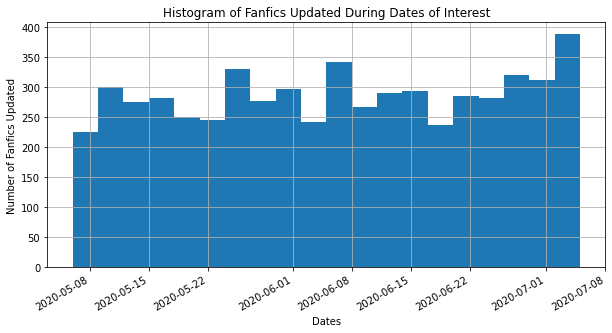

In [13]:
#Create temp table with narrowed down date view 
temp = AO3[AO3['Date_updated'] < pd.Timestamp(2020,7,6)]

#Plot Dates on a histogram
ax = temp['Date_updated'].hist(figsize=(10,5), bins=20)

#Avoid overlapping dates
plt.gcf().autofmt_xdate()

plt.title("Histogram of Fanfics Updated During Dates of Interest")
plt.xlabel('Dates')
plt.ylabel('Number of Fanfics Updated')
plt.show()

Next we'll want to start looking at our actual areas of interest, the number of fanfiction works posted by the various flags we previously identified. 

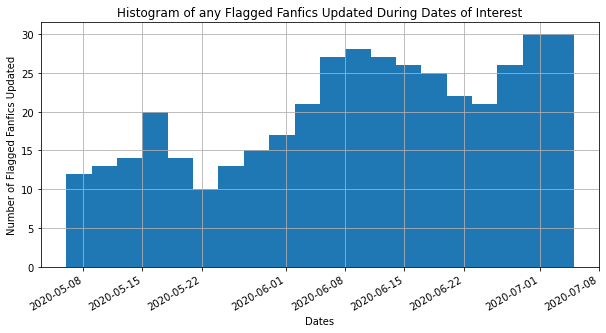

In [14]:
temp_all_flags = temp[temp['all_flags'] == True] 

ax = temp_all_flags['Date_updated'].hist(figsize=(10,5), bins=20) 

#Avoid overlapping dates
plt.gcf().autofmt_xdate()

plt.title("Histogram of any Flagged Fanfics Updated During Dates of Interest")
plt.xlabel('Dates')
plt.ylabel('Number of Flagged Fanfics Updated')
plt.show()

Using the above, we start to visualize a trend, while the counts have dramatically decreased, there was an uptick in the fics that were updated after the date in question containing references to gender or sexuality. Now let's break it down into our gender and sexuality categories. 

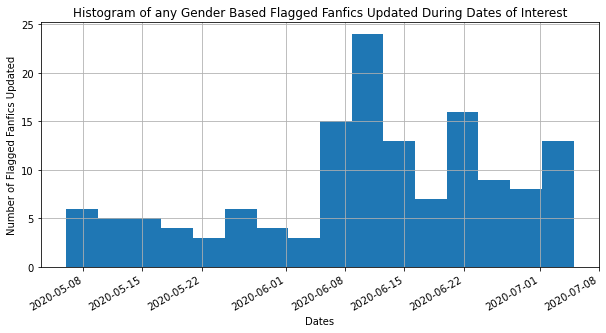

In [15]:
temp_gender_flags = temp[temp['gender_flag'] == True] 

ax = temp_gender_flags['Date_updated'].hist(figsize=(10,5), bins=16) 

#Avoid overlapping dates
plt.gcf().autofmt_xdate()

plt.title("Histogram of any Gender Based Flagged Fanfics Updated During Dates of Interest")
plt.xlabel('Dates')
plt.ylabel('Number of Flagged Fanfics Updated')
plt.show()

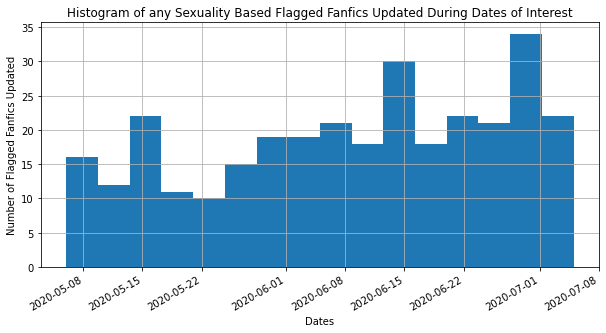

In [16]:
temp_sexuality_flags = temp[temp['sexuality_flag'] == True] 

ax = temp_sexuality_flags['Date_updated'].hist(figsize=(10,5), bins=16) 

#Avoid overlapping dates
plt.gcf().autofmt_xdate()

plt.title("Histogram of any Sexuality Based Flagged Fanfics Updated During Dates of Interest")
plt.xlabel('Dates')
plt.ylabel('Number of Flagged Fanfics Updated')
plt.show()

Now that we've split out our flags by gender and sexuality we can see that before June 6th, we had very few works of fanfiction being posted in which updates to the canon characters' gender identity played a role, but after the date in question, a large spike was observed. However, we are still only looking a an extremely small subset of the vast amount of works posted on the stie on a regular basis, so instead we'll need to prove that this difference is significant. 

### <center>Hypothesis Testing</center>

We've seen the impact that Rowling's tweets have had on the posting of transformative works featuring queer identities visually, but now we need to prove that this impact is actually significant. In order to do this, we'll be completing some basic hypothesis testing. 

<b>Our Hypothesis:</b> We hypothesize that the tweets posted by J.K. Rowling on June 6th, 2020, caused a significant increase in the number of transformative works posted to the site AO3 that contained changes to canon characters' gender or sexual identity. 

Thus our <b>Null Hypothesis:</b> The tweets posted by J.K. Rowling on June 6th, 2020, had no impact on the number of transformative works posted to the site AO3 that contained changes to canon characters' gender or sexual identity. 

Using the data we already have, we can easily use a proportions based z-test. So first we need to calculate our expected proportions based on the May data and then we can calculate for our June data. To find all of our proportions, we'll need to reflag our data in our still separated May and June data frames. Then we can use a simple count against the total to find our proportions for our time frames of interest.  

In [17]:
#Flag for presence of Lesbian
AO3May["flag_lesbian"] = np.where( (AO3May["Tags"].str.contains("lesbian", case=False)) | (AO3May["Pairing"].str.contains('F\\\F', regex=True)), True, False )

#Flag for presence of Gay 
AO3May["flag_gay"] = np.where( (AO3May["Tags"].str.contains("gay", case=False)) | (AO3May["Pairing"].str.contains('M\\\M', regex=True)), True, False )

#Flag for presence of Bisexual 
AO3May["flag_bisexual"] = AO3May["Tags"].str.contains("bisexual", case=False)

#Flag for presence of Trans 
AO3May["flag_trans"] = AO3May["Tags"].str.contains("trans", case=False)

#Flag for presence of Nonbinary
AO3May["flag_nb"] = AO3May["Tags"].str.contains("nonbinary", case=False)

#Flag for presence of Queer 
AO3May["flag_queer"] = AO3May["Tags"].str.contains("queer", case=False)

#Flag for presence of Intersex 
AO3May["flag_intersex"] = AO3May["Tags"].str.contains("intersex", case=False)

#Flag for presence of Asexual 
AO3May["flag_ace"] = AO3May["Tags"].str.contains("asexual", case=False)

#Flag for presence of Agender 
AO3May["flag_agender"] = AO3May["Tags"].str.contains("agender", case=False)

#Flag for presence of Aromantic 
AO3May["flag_aro"] = AO3May["Tags"].str.contains("aromantic", case=False)

#Flag all dealing with gender 
AO3May["gender_flag"] = np.where( (AO3May["flag_trans"] | AO3May["flag_nb"] | AO3May["flag_queer"] | AO3May["flag_intersex"] | AO3May["flag_agender"]), True, False)

#Flag all dealing with sexuality 
AO3May["sexuality_flag"] = np.where( (AO3May["flag_lesbian"] | AO3May["flag_gay"] | AO3May["flag_bisexual"] | AO3May["flag_queer"] | AO3May["flag_ace"] | AO3May["flag_aro"]), True, False)

#Flag all LGBT 
AO3May["all_flags"] = np.where( (AO3May["gender_flag"] | AO3May["sexuality_flag"]), True, False)

#Display the final dataframe
AO3May.head(10)

,Title,Author,ID,Date_updated,Rating,Pairing,Warning,Complete,Language,Word_count,...,flag_trans,flag_nb,flag_queer,flag_intersex,flag_ace,flag_agender,flag_aro,gender_flag,sexuality_flag,all_flags
0,Seven,AmeliaDarkholme,24030196,2020-05-06,Teen And Up Audiences,"F/M, M/M",No Archive Warnings Apply,Complete Work,English,"11,217",...,False,False,False,False,False,False,False,False,False,False
1,Lullaby of Woe,EmiliaVBlake,24030472,2020-06-06,Mature,"F/F, F/M, M/M",Graphic Depictions Of Violence,Work in Progress,English,"60,121",...,False,False,False,False,False,False,False,False,False,False
2,Ron's family,Lilys_Dreamland,24030550,2020-05-06,General Audiences,No category,Choose Not To Use Archive Warnings,Work in Progress,English,591,...,False,False,False,False,False,False,False,False,False,False
3,Falling In Love (Is So Alone),hannahsoapy,24030559,2020-05-05,General Audiences,Gen,No Archive Warnings Apply,Complete Work,English,"1,091",...,False,False,False,False,False,False,False,False,False,False
4,The Bloody Secret,psc07,24030709,2020-05-06,Teen And Up Audiences,F/M,Choose Not To Use Archive Warnings,Complete Work,English,"11,635",...,False,False,False,False,False,False,False,False,False,False
5,Burnt Kiss,BittersweetAlias,24030718,2020-05-15,Explicit,M/M,Choose Not To Use Archive Warnings,Complete Work,English,"85,542",...,False,False,False,False,False,False,False,False,False,False
6,Stars turn to Moons,Silveraro,24030754,2020-05-12,General Audiences,F/M,No Archive Warnings Apply,Work in Progress,English,"4,194",...,True,False,False,False,False,False,False,True,False,True
7,Turnabout,MercurialTenacity,24030757,2020-05-06,Mature,M/M,No Archive Warnings Apply,Complete Work,English,"1,241",...,False,False,False,False,False,False,False,False,False,False
8,New romantics,aboringmess,24030865,2020-05-06,General Audiences,F/M,Choose Not To Use Archive Warnings,Complete Work,English,"2,128",...,False,False,False,False,False,False,False,False,False,False
9,Home Again,Paramour_Party,24030946,2021-01-31,Teen And Up Audiences,F/M,No Archive Warnings Apply,Work in Progress,English,"67,871",...,False,False,False,False,False,False,False,False,False,False


In [18]:
#Flag for presence of Lesbian
AO3June["flag_lesbian"] = np.where( (AO3June["Tags"].str.contains("lesbian", case=False)) | (AO3June["Pairing"].str.contains('F\\\F', regex=True)), True, False )

#Flag for presence of Gay 
AO3June["flag_gay"] = np.where( (AO3June["Tags"].str.contains("gay", case=False)) | (AO3June["Pairing"].str.contains('M\\\M', regex=True)), True, False )

#Flag for presence of Bisexual 
AO3June["flag_bisexual"] = AO3June["Tags"].str.contains("bisexual", case=False)

#Flag for presence of Trans 
AO3June["flag_trans"] = AO3June["Tags"].str.contains("trans", case=False)

#Flag for presence of Nonbinary
AO3June["flag_nb"] = AO3June["Tags"].str.contains("nonbinary", case=False)

#Flag for presence of Queer 
AO3June["flag_queer"] = AO3June["Tags"].str.contains("queer", case=False)

#Flag for presence of Intersex 
AO3June["flag_intersex"] = AO3June["Tags"].str.contains("intersex", case=False)

#Flag for presence of Asexual 
AO3June["flag_ace"] = AO3June["Tags"].str.contains("asexual", case=False)

#Flag for presence of Agender 
AO3June["flag_agender"] = AO3June["Tags"].str.contains("agender", case=False)

#Flag for presence of Aromantic 
AO3June["flag_aro"] = AO3June["Tags"].str.contains("aromantic", case=False)

#Flag all dealing with gender 
AO3June["gender_flag"] = np.where( (AO3June["flag_trans"] | AO3June["flag_nb"] | AO3June["flag_queer"] | AO3June["flag_intersex"] | AO3June["flag_agender"]), True, False)

#Flag all dealing with sexuality 
AO3June["sexuality_flag"] = np.where( (AO3June["flag_lesbian"] | AO3June["flag_gay"] | AO3June["flag_bisexual"] | AO3June["flag_queer"] | AO3June["flag_ace"] | AO3June["flag_aro"]), True, False)

#Flag all LGBT 
AO3June["all_flags"] = np.where( (AO3June["gender_flag"] | AO3June["sexuality_flag"]), True, False)

#Display the final dataframe
AO3June.head(10)

,Title,Author,ID,Date_updated,Rating,Pairing,Warning,Complete,Language,Word_count,...,flag_trans,flag_nb,flag_queer,flag_intersex,flag_ace,flag_agender,flag_aro,gender_flag,sexuality_flag,all_flags
0,I Love You,orphan_account,24562783,2020-06-05,General Audiences,M/M,No Archive Warnings Apply,Complete Work,English,515,...,False,False,False,False,False,False,False,False,False,False
1,Hanker Sore,etymolodrarry,24562885,2020-06-06,Teen And Up Audiences,M/M,Choose Not To Use Archive Warnings,Complete Work,English,"2,612",...,False,False,False,False,False,False,False,False,False,False
2,The Secrets And Lovers We Hide Deep In Our Hearts,ReyAndor19,24562987,2020-06-06,General Audiences,F/M,"Choose Not To Use Archive Warnings, No Archive...",Complete Work,English,459,...,False,False,False,False,False,False,False,False,False,False
3,Still Enough To Count,Nununununu,24563008,2020-07-12,Teen And Up Audiences,M/M,No Archive Warnings Apply,Complete Work,English,"6,137",...,False,False,False,False,False,False,False,False,False,False
4,Clueless,etymolodrarry,24563143,2020-06-06,Teen And Up Audiences,M/M,Choose Not To Use Archive Warnings,Complete Work,English,"2,790",...,False,False,False,False,False,False,False,False,True,True
5,Interruption,Tricki,24563200,2020-06-06,Not Rated,F/M,No Archive Warnings Apply,Complete Work,English,755,...,False,False,False,False,False,False,False,False,False,False
6,Bun Bun,NuclearNik,24563278,2020-06-06,General Audiences,F/M,No Archive Warnings Apply,Complete Work,English,454,...,False,False,False,False,False,False,False,False,False,False
7,Sink Or Swim,MissDrarryDawn,24563461,2020-06-06,Mature,"F/M, M/M",Choose Not To Use Archive Warnings,Complete Work,English,"5,606",...,False,False,False,False,False,False,False,False,False,False
8,Just a Birthday,Aneiria,24563605,2020-06-06,Explicit,Multi,No Archive Warnings Apply,Complete Work,English,"3,668",...,False,False,False,False,False,False,False,False,False,False
9,Magical boarding school (Draco Malfoy x Origin...,Crystal_BangTan,24563638,2021-11-21,Teen And Up Audiences,F/M,Major Character Death,Work in Progress,English,"31,653",...,False,False,False,False,False,False,False,False,False,False


Now that our flags are applied to our separated May and June data, we can calculate each of the numbers we'll need from the dataframes. 

In [22]:
#Store the sizes of both the May and June data
MayN = len(AO3May)
JuneN = len(AO3June) 

#Store the number of Trues for the flag for either gender or sexuality being a tag
MayCountAll = AO3May["all_flags"].sum()
JuneCountAll = AO3June["all_flags"].sum()


#null proportion is the count of May 
pnull = MayCountAll/MayN
phat = JuneCountAll/JuneN

print("The Null Proportion is: " + str(pnull))
print("The Test Proportion is: " + str(phat))

The Null Proportion is: 0.073488134728247
The Test Proportion is: 0.0976079186142425


Now that we have our proportions, we can use the built in module to complete our z-test. 

In [34]:
import statsmodels as sm

stat,pval = sm.stats.proportion.proportions_ztest(phat * MayN, MayN, pnull)
result = (pval < 0.05)

print("The results of the z test are: ") 
print(str(pval) + " < 0.05  = " + str(result))

The results of the z test are: 
3.624458488701455e-07 < 0.05  = True


Based on the result of the above test, we can handily reject the Null hypothesis that the tweets posted by J.K. Rowling on June 6th, 2020, had no impact on the number of transformative works posted to the site AO3 that contained changes to canon characters' gender or sexual identity. 

### <center>Conclusions</center>

In conclusion, 